# Tendecias de Videojuegos 

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

## cargar librerias

In [42]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

## cargar dataset

In [43]:
df_games = pd.read_csv('games.csv')

In [44]:
# vista general
df_games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [45]:
# información general
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## preparación de datos

In [46]:
# Asegurarse de que los nombres de columnas estén en minúsculas
df_games.columns = df_games.columns.str.lower()

# Convertir a minúsculas las columnas relevantes
for col in ['name', 'platform', 'genre']:
    if col in df_games.columns:
        df_games[col] = df_games[col].str.lower()

# Mostrar resultados
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### procesar valores ausentes

#### valores ausentes en name 

In [47]:
df_games[df_games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [48]:
# eliminar valores ausentes en name
df_games.dropna(subset = ['name'], inplace = True)

#revisamos los cambios
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


- al mirar los valores nulos de name me di cuenta que es mejor eliminar ya que solo son 2 y justo estos tambien son los valores nulos en genre

#### valores ausentes en Year_of_Release

In [49]:
df_games[df_games['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,ps2,NaN,sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,fifa soccer 2004,ps2,NaN,sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,lego batman: the videogame,wii,NaN,action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe smackdown vs. raw 2006,ps2,NaN,fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,space invaders,2600,NaN,shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,pdc world championship darts 2008,psp,NaN,sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,freaky flyers,gc,NaN,racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,inversion,pc,NaN,shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,hakuouki: shinsengumi kitan,ps3,NaN,adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


- en este caso voy a dejar los valores nulos en fecha de lanzamiento. no tengo forma de rellenar los valores nulos y son muchos datos importantes para ser eliminados

#### valores ausentes en Critic_Score

In [50]:
print('numero de valores ausentes de Critic_Score:', df_games['critic_score'].isna().sum())

numero de valores ausentes de Critic_Score: 8576


In [51]:
#comprobar datos para hacer el respectivo reemplazo de valores ausentes 
df_games['critic_score'].describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

In [52]:
# reemplazar con mediana 
df_games['critic_score'] = df_games['critic_score'].fillna(df_games['critic_score'].median())

#mostrar cambios
df_games['critic_score'].describe()

count    16713.000000
mean        70.010531
std          9.778073
min         13.000000
25%         71.000000
50%         71.000000
75%         71.000000
max         98.000000
Name: critic_score, dtype: float64

- La mediana (71) es la mejor opción porque representa un valor central sin ser afectado por valores extremos.

#### valores ausentes en User_Score

In [53]:
print('numero de valores ausentes de User_Score:', df_games['user_score'].isna().sum())

numero de valores ausentes de User_Score: 6699


In [54]:
#convertir TBD a NaN
df_games['user_score'] = pd.to_numeric(df_games['user_score'], errors='coerce')

In [55]:
#comprobar datos para hacer el respectivo reemplazo de valores ausentes 
df_games['user_score'].describe()

count    7590.000000
mean        7.125046
std         1.500006
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

In [56]:
# reemplazar con mediana 
df_games['user_score'] = df_games['user_score'].fillna(df_games['user_score'].median())

# mostrar cambios
df_games['user_score'].describe()

count    16713.000000
mean         7.329719
std          1.027910
min          0.000000
25%          7.500000
50%          7.500000
75%          7.500000
max          9.700000
Name: user_score, dtype: float64

- cambimos tbd a nulos para ser procesados ya que no nos aporta tener esto en una columna numerica.
- luego como hicimos en critic_score cambiamos los valores nulos por la mediana

#### valores ausentes en Rating

In [57]:
print('numero de valores ausentes de Rating:', df_games['rating'].isna().sum())

numero de valores ausentes de Rating: 6764


In [58]:
# valores unicos de Rating
print('valores unicos de Rating:', df_games['rating'].unique())

valores unicos de Rating: ['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


In [59]:
# reemplazar por "RP" (Rating Pending)
df_games['rating'] = df_games['rating'].fillna('RP')

# mostrar cambio
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


- en este caso los valores ausentes los reemplace por 'RP' que significa rating pendiente

### convertir tipo de datos

In [60]:
# primero cambio user_score para que coincida con el formato de critic_score
df_games['user_score'] = df_games['user_score'] * 10

# convetir a int 
df_games['critic_score'] = df_games['critic_score'].astype('int')
df_games['user_score'] = df_games['user_score'].astype('int')

# mostrar información
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  int32  
 9   user_score       16713 non-null  int32  
 10  rating           16713 non-null  object 
dtypes: float64(5), int32(2), object(4)
memory usage: 1.4+ MB


- cambie el formato de user_score ya que estaba en decimal, su escala era de 0 a 10. la cambie multiplicando a 10 para cambiarla de 0 a 100 como en la columna critic_Score, para hacer una mejor comparación de las criticas. luego pase la columna a enteros.
- todos los valores de critic_Score  eran valores enteros, pero como tenia valores nulos estaba en flotante asi que lo converti a enteros.

### ventas totales

In [61]:
# creo columna con las ventas totales
df_games['sales_total'] = df_games[['na_sales','jp_sales','eu_sales','other_sales']].sum(axis=1)

# mostrar resultado
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76,80,E,82.54
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,71,75,RP,40.24
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82,83,E,35.52
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80,80,E,32.77
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,71,75,RP,31.38


## Análisis  de datos 

### juegos por fecha de lanzamiento

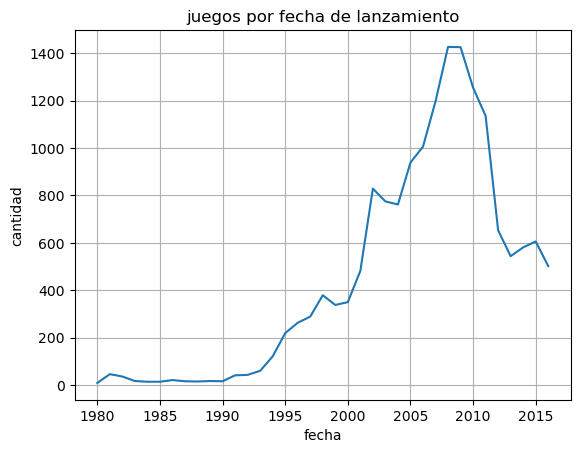

In [62]:
games_release = df_games.groupby('year_of_release')['name'].count()

games_release.plot(
title='juegos por fecha de lanzamiento',
xlabel='fecha',
ylabel='cantidad',
grid= '--')

plt.show()

- podemos observar como amedida que el juego es mas reciente, mas ventas tiene. esto sucede hasta llegar al 2009, despues decienden las ventas.

### plataformas por ventas

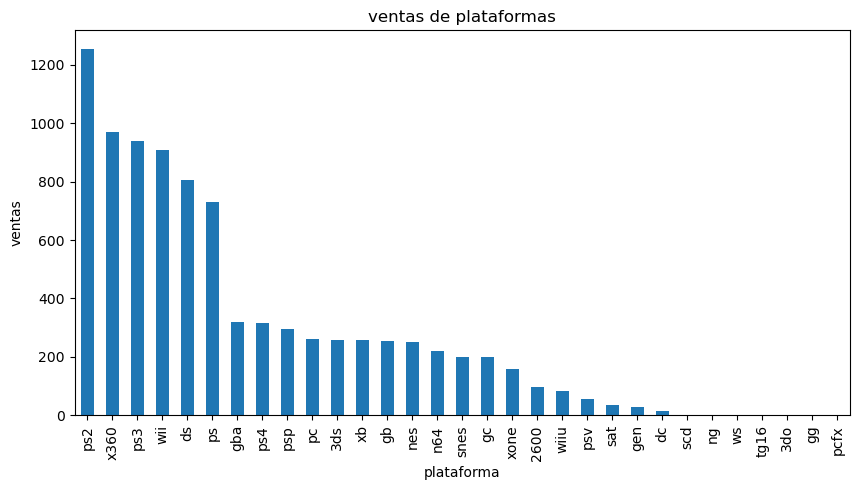

In [63]:
platform_sales = df_games.groupby('platform')['sales_total'].sum().sort_values(ascending=False)

platform_sales.plot(
kind='bar',
title='ventas de plataformas',
xlabel='plataforma',
ylabel='ventas',
figsize=(10,5)
)

plt.show()

### plataformas mas vendiadas por fecha de lanzamineto

In [64]:
# Seleccionar las 10 plataformas con mayores ventas
top_platforms = platform_sales.head(10).reset_index()

df_top_platforms = df_games[df_games['platform'].isin(top_platforms['platform'])]

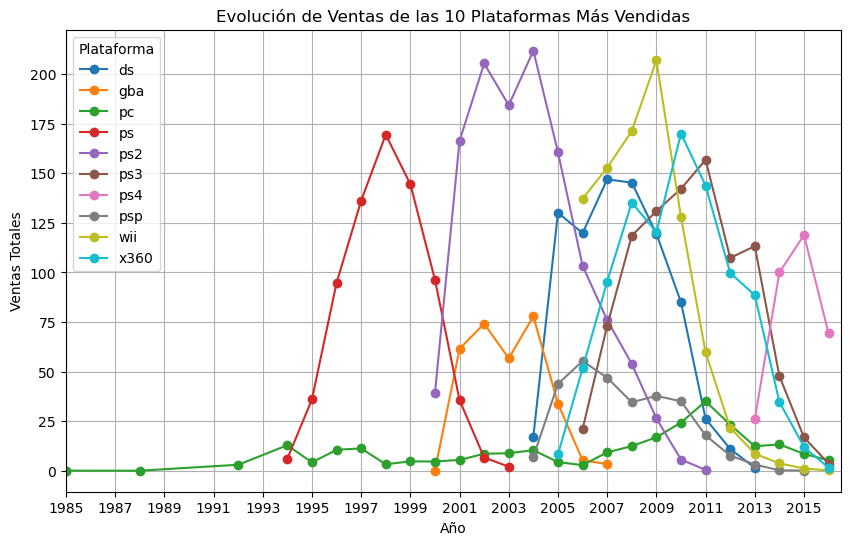

In [65]:
# Agrupar por año y plataforma, sumando ventas
yearly_sales = df_top_platforms.groupby(['year_of_release', 'platform'])['sales_total'].sum().unstack()

# Graficar solo las 5 plataformas más vendidas
yearly_sales.plot(
    kind='line',
    title='Evolución de Ventas de las 10 Plataformas Más Vendidas',
    xlim=[1991.5,2016.5],
    xlabel='Año',
    ylabel='Ventas Totales',
    figsize=(10, 6),
    marker='o'
)

plt.xticks(np.arange(1985, 2017, 2))
plt.yticks(np.arange(0, 220, 25))
plt.grid('--')
plt.legend(title="Plataforma")
plt.show()

**Plataformas que solían ser populares pero que ahora no tienen ventas**

Observando la gráfica, algunas plataformas tuvieron un auge significativo en ventas, pero luego desaparecieron. Algunas de ellas son:

- PS2 (Línea morada oscura): Dominó las ventas en los 2000, pero desapareció después de 2012.
- PSP (Línea gris): Tuvo un buen desempeño entre 2005 y 2012, pero luego desapareció.
- DS (Línea azul clara): Popular desde 2005, con un pico alrededor de 2008-2009, pero después de 2014 dejó de venderse.
- GBA (Línea naranja): Despegó en 2001 y desapareció alrededor de 2007-2008.
- PS1 (Línea roja): Fue líder en ventas desde mediados de los 90 hasta el 2002, luego desapareció.


**¿Cuánto tardan en aparecer las nuevas plataformas y en desaparecer las antiguas?**

Basándonos en la gráfica:

- Tiempo de aparición:
Las plataformas suelen tardar entre 1 y 3 años desde su lanzamiento en generar ventas significativas. Por ejemplo:

    - La Wii se lanzó en 2006 y en 2007 ya tenía un pico alto de ventas.
    - La PS3 se lanzó en 2006 y en 2007-2008 ya tenía buenas cifras.
    
- Tiempo de desaparición:

    - Plataformas exitosas pueden tardar entre 7 y 10 años en desaparecer. Ejemplo:
    - PS2 dominó entre 2000 y 2010.
    - DS tuvo su auge desde 2005 hasta 2014.
- Plataformas menos exitosas pueden desaparecer en 4-6 años, como la GBA que solo tuvo presencia entre 2001 y 2007.

**Conclusión:**

- Las plataformas más exitosas pueden mantenerse en el mercado por 10 años o más.
- Las menos exitosas desaparecen en menos de 6 años.
- La mayoría de las plataformas tardan entre 1 y 3 años en alcanzar su auge.

In [66]:
# Filtrar para años relevantes (posteriores a 2013)
df_games = df_games[df_games['year_of_release'] > 2013]

- del años 1993 en adelante se concentra la mayoria de datos del top 10

### plataformas lideres en ventas

In [67]:
print('las 6 plataformas con mas venta', platform_sales.head(6))

las 6 plataformas con mas venta platform
ps2     1255.77
x360     971.42
ps3      939.65
wii      907.51
ds       806.12
ps       730.86
Name: sales_total, dtype: float64


- tome las 6 plataformas mas populares, de la 7 en adelante bajan cosiderablemente las ventas

### segun la grafica del top 10

**Plataformas en Crecimiento**
Son las que muestran una tendencia positiva en ventas y podrían ser rentables en el futuro.

- Última plataforma en la gráfica con tendencia en ascenso.
- Aunque no tiene picos altos, mantiene ventas constantes en el tiempo.

**Plataformas en Declive**
Plataformas que solían vender bien, pero han disminuido o desaparecido.

- PS2: Se desplomó después de 2010.
- PS3 y X360: En declive después de 2014.
- Wii: Fue exitosa, pero cayó rápido después de 2012.
- DS & PSP: Dominaban entre 2005-2010, pero se extinguieron después de 2014.

**Plataformas Potencialmente Rentables**
Si buscamos plataformas para invertir o vender juegos, las mejores opciones serían:

- PS4: En crecimiento y con demanda fuerte.
- PC: Siempre estable, sin grandes caídas de ventas.

### diagrama de caja

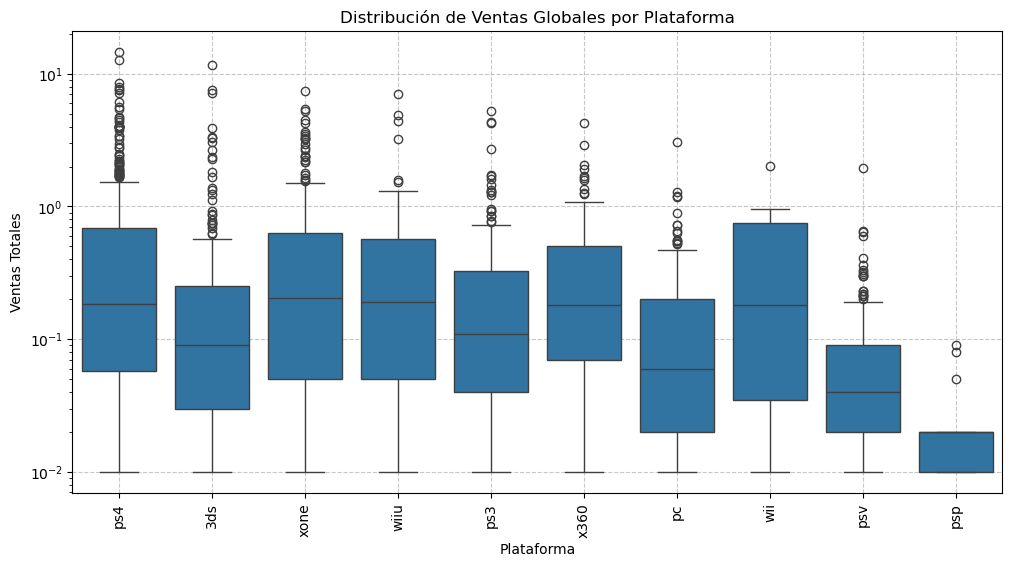

In [68]:
# Agrupar y resetear el índice para obtener un DataFrame adecuado para boxplot
diagrama = df_games.groupby(['platform'])['sales_total'].sum()

# Crear el boxplot de ventas globales por plataforma
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_games, x='platform', y='sales_total')

# Personalizar gráfico
plt.title("Distribución de Ventas Globales por Plataforma")
plt.xticks(rotation=90)
plt.ylabel("Ventas Totales")
plt.xlabel("Plataforma")
plt.yscale("log")  # Escala logarítmica para evitar outliers extremos
plt.grid(True, linestyle="--", alpha=0.7)

plt.show()

**¿Son significativas las diferencias en las ventas?**

Sí, hay diferencias significativas entre las plataformas en cuanto a ventas.
- Algunas plataformas tienen medianas de ventas mucho más altas.
- Otras tienen una mayor dispersión en las ventas.
- Hay plataformas con ventas muy bajas y menor dispersión.
-Los puntos fuera de la caja indican títulos con ventas muy superiores a la media, que suelen ser los juegos más populares de cada plataforma.

**Ventas Promedio en Diferentes Plataformas**

Plataformas con ventas promedio más altas
- Wii, X360, PS2, PS3, WiiU: Estas consolas tuvieron múltiples juegos con grandes ventas, lo que eleva su promedio.
Las cajas en el diagrama son más altas en estas plataformas, lo que indica que incluso los juegos de menor rendimiento lograban ventas decentes.

Plataformas con ventas promedio más bajas
- psv, Pc: Aunque algunas tuvieron juegos exitosos, la mayoría de sus títulos tuvieron ventas más bajas.

Plataformas con ventas muy bajas o nicho
- psp: Estas plataformas tienen medianas de ventas cercanas a cero, indicando que muy pocos juegos lograron éxito en el mercado.

**conclusiones**

1. Las diferencias en ventas son muy significativas entre las plataformas, con algunas dominando el mercado y otras con impacto marginal.
2. Las plataformas más exitosas muestran ventas más estables y con más juegos de alto rendimiento.
3. Las plataformas más recientes (PS4) siguen mostrando potencial de crecimiento.
4. El PC tiene una distribución amplia, lo que indica que hay juegos con ventas muy bajas y algunos con éxito considerable, reflejando un mercado más diverso.

### Reviews  

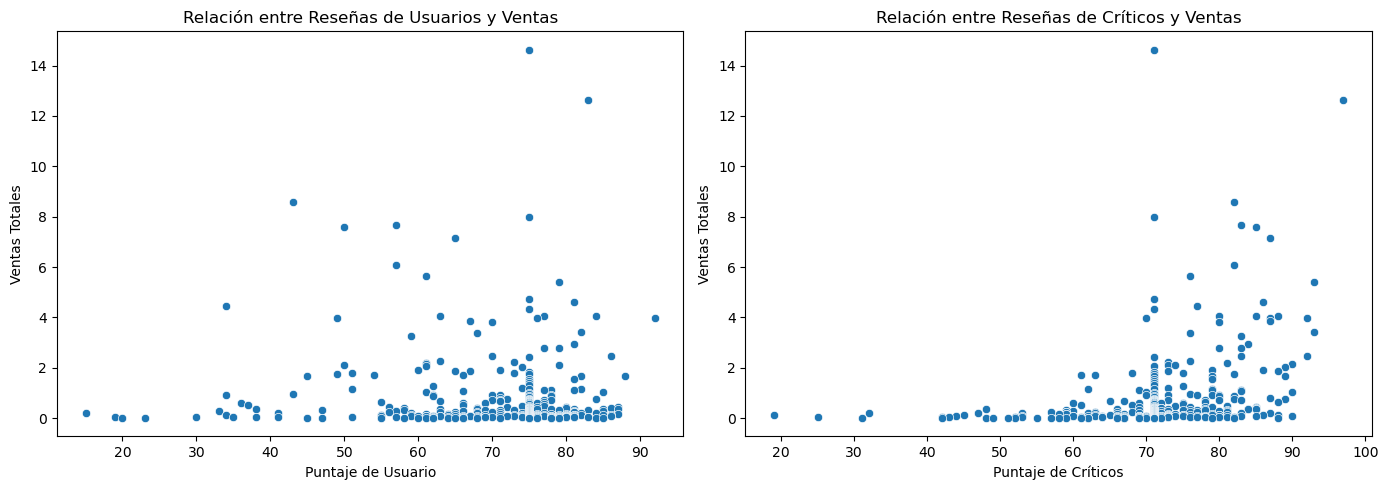

In [69]:
# seleccionar platafomra
df_ps4 = df_games[df_games['platform'] == 'ps4']

# Crear gráficos de dispersión
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Reviews de usuarios 
sns.scatterplot(data=df_ps4, x='user_score', y='sales_total', ax=ax[0])
ax[0].set_title('Relación entre Reseñas de Usuarios y Ventas')
ax[0].set_xlabel('Puntaje de Usuario')
ax[0].set_ylabel('Ventas Totales')

# Reviews  de criticos 
sns.scatterplot(data=df_ps4, x='critic_score', y='sales_total', ax=ax[1])
ax[1].set_title('Relación entre Reseñas de Críticos y Ventas')
ax[1].set_xlabel('Puntaje de Críticos')
ax[1].set_ylabel('Ventas Totales')

plt.tight_layout()
plt.show()

podemos observar que las Reviews de usuarios y criticos son bastantes parecidas

In [70]:
# Calcular correlaciones
correlacion_user = df_ps4[['user_score', 'sales_total']].corr().iloc[0, 1]
correlacion_critic = df_ps4[['critic_score', 'sales_total']].corr().iloc[0, 1]

print(f"Correlación entre Reseñas de Usuarios y Ventas: {correlacion_user:.2f}")
print(f"Correlación entre Reseñas de Críticos y Ventas: {correlacion_critic:.2f}")

Correlación entre Reseñas de Usuarios y Ventas: -0.06
Correlación entre Reseñas de Críticos y Ventas: 0.33


las reseñas de los criticos parece ser algo influyente a los usuarios a la hora de la venta. mientras que la correlación de reseñas de usuarios es negativa. en todo caso ninguna de las reseñas tiene influir en la venta

### juegos

In [71]:
# Filtrar solo los juegos que están en múltiples plataformas
multi_platform_games = df_top_platforms[df_top_platforms.duplicated(subset=['name'], keep=False)]

# Agrupar ventas por juego y plataforma
sales_comparison = multi_platform_games.groupby(['name', 'platform'])['sales_total'].sum().unstack()

<Figure size 1400x600 with 0 Axes>

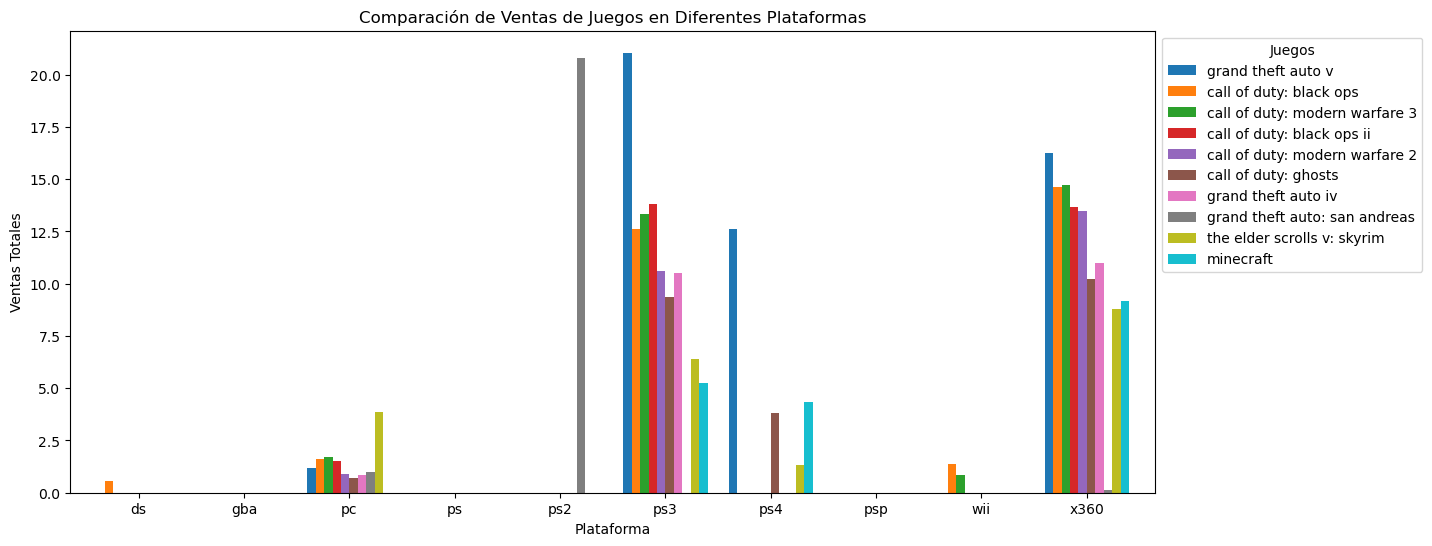

In [72]:
# Tomar los juegos más vendidos en general
top_games = sales_comparison.sum(axis=1).sort_values(ascending=False).head(10)

# Graficar la comparación de ventas por plataforma
plt.figure(figsize=(14, 6))
sales_comparison.loc[top_games.index].T.plot(kind='bar', figsize=(14,6), width=0.8)
plt.title('Comparación de Ventas de Juegos en Diferentes Plataformas')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=360)
plt.legend(title="Juegos", bbox_to_anchor=(1,1))
plt.show()

- podemos observar como las franfranquicias de gta y cod lideran la industria de los videojuegos al ser los juego  mas vendidos en diversas plataformas. como excepción tenemos a Minecraft y the elder scrolls.
- tambien podemos apreciar que en ps3 y x360 se concentran la gran mayoria de juegos que estan en diferentes paltafornas,

### genero

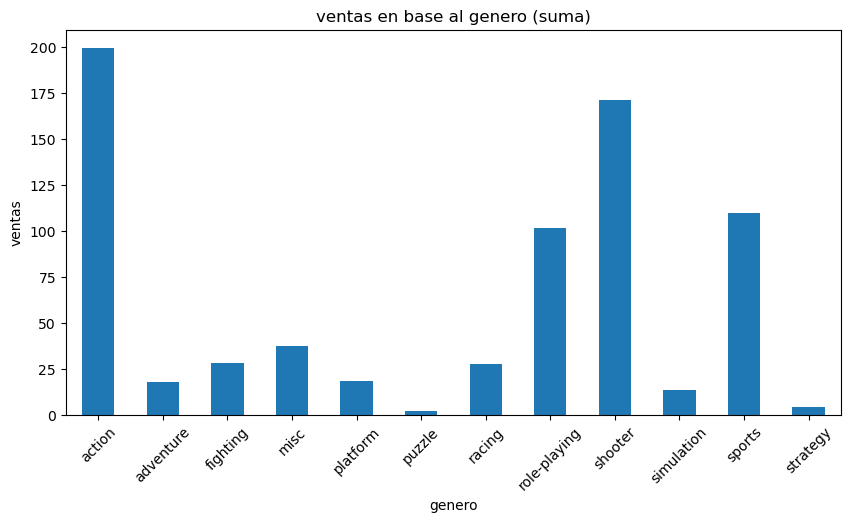

In [73]:
# suma total de ventas por genero
genre_sales_sum = df_games.groupby('genre')['sales_total'].sum()

genre_sales_sum.plot(
kind='bar',
title='ventas en base al genero (suma)',
xlabel='genero',
ylabel='ventas',
figsize=(10,5),
rot=45
)

plt.show()

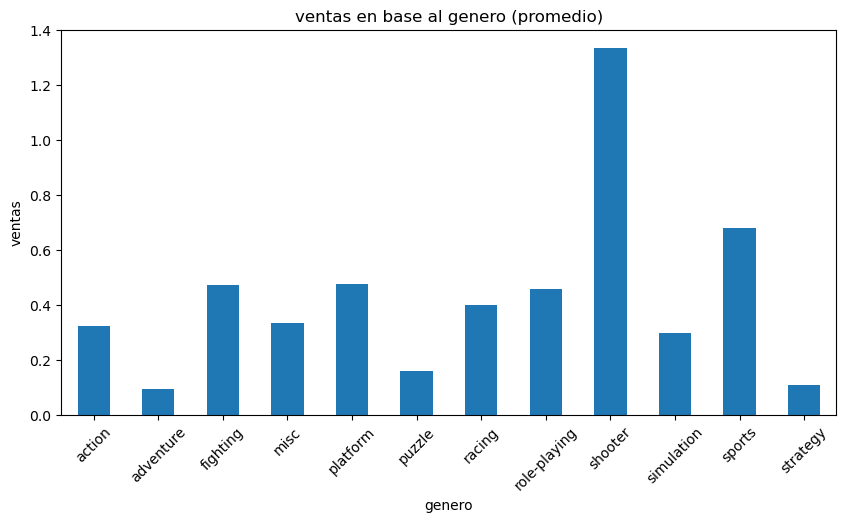

In [74]:
# promedio total de ventas por genero
genre_sales_mean = df_games.groupby('genre')['sales_total'].mean()

genre_sales_mean.plot(
kind='bar',
title='ventas en base al genero (promedio)',
xlabel='genero',
ylabel='ventas',
figsize=(10,5),
rot=45
)

plt.show()

- la distribución entre la suma y el promedio son distintas. action libera en ventas y shooter en el promedio lo que indica que las juegos de shooter son mas costosos.
- sports se encuentra en un equilibrio al tener ventas respecto al promedio.

## perfil de usuario para cada región

### en base a las plataformas 

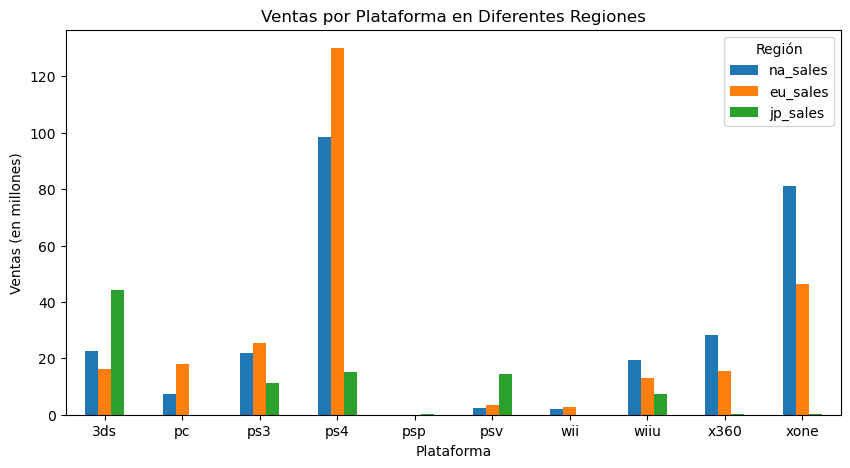

In [75]:
# Crear gráfico de barras sin apilar
sales_by_platform = df_games.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum()


sales_by_platform.plot(
    kind='bar', stacked=False, figsize=(10,5)
)

plt.title('Ventas por Plataforma en Diferentes Regiones')
plt.xlabel('Plataforma')
plt.ylabel('Ventas (en millones)')
plt.legend(title='Región')
plt.xticks(rotation=360)

plt.show()

las ventas por cada region son bastante diferentes por cada región.

- norte america lidera con la xone, x360.
- europa lidera la venta de la ps4 siendo la muy vendida en ese lugar, tambien es bastante vendida en norte america.
- japon en general no tiene muchas ventas, pero es muy presente con la 3ds, siendo la mas popular en japon

### en base a las categorias

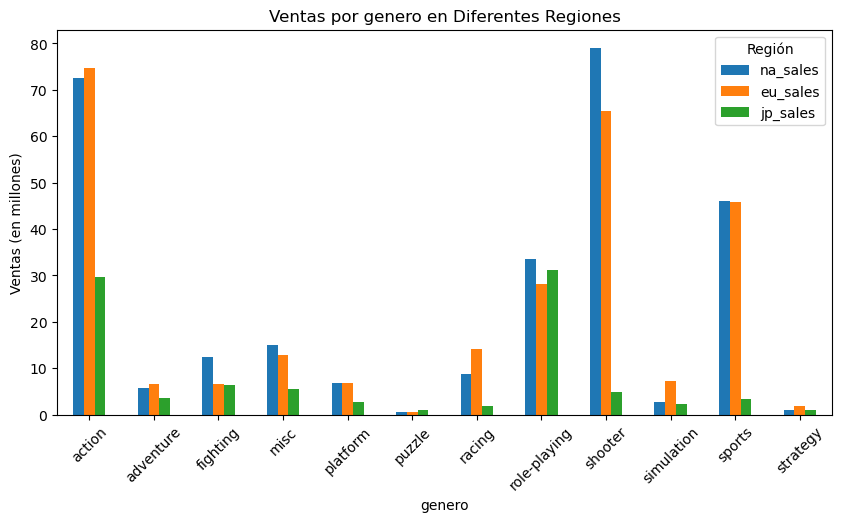

In [76]:
# Crear gráfico de barras sin apilar
sales_by_genre = df_games.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum()

sales_by_genre.plot(
    kind='bar', stacked=False, figsize=(10,5)
)

plt.title('Ventas por genero en Diferentes Regiones')
plt.xlabel('genero')
plt.ylabel('Ventas (en millones)')
plt.legend(title='Región')
plt.xticks(rotation=45)

plt.show()

- el genero de acción y shooter libera en norte america  y europa.
- el genero sports tienen vantas buenas en norte america y europa, van muy a la par.
- por otro lado el genero role-playing tambien tiene buenas ventas, menores que otras. pero es constate en las ventas ya que las 3 regiones tienen ventas parecidas.
- japon no destaca mucho, solo en role-playing siendo el segundo con mas ventas.

### en base al ESRB 

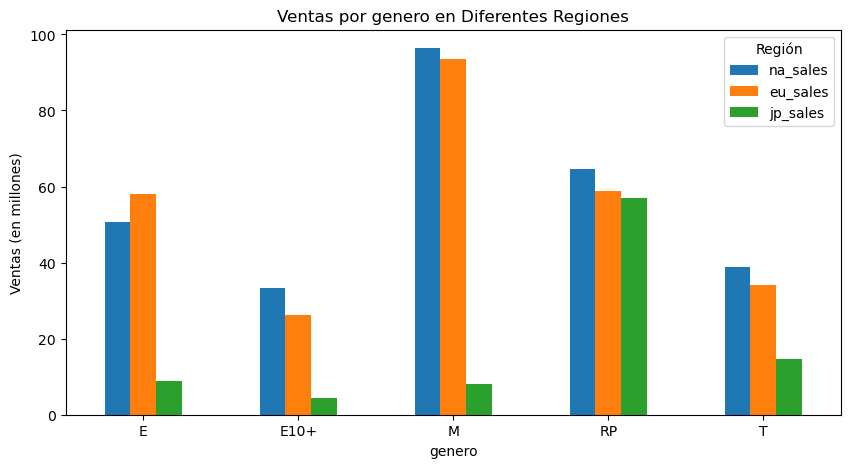

In [77]:
# Crear gráfico de barras sin apilar
sales_by_genre = df_games.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()

sales_by_genre.plot(
    kind='bar', stacked=False, figsize=(10,5)
)

plt.title('Ventas por genero en Diferentes Regiones')
plt.xlabel('genero')
plt.ylabel('Ventas (en millones)')
plt.legend(title='Región')
plt.xticks(rotation=360)

plt.show()

- podemos observar que la mayoria de ventas proviene de M (maduro), al ser para mayores de edad tiene su publico fijo que le gustan juegos con ese estilo

- E, E10+, al ser para todos cuenta con buenas ventas.

- RP (rating pendiente), una cantidad cosiderable de juegos no tienen clasificación, seria difícil determinar su segmento.

## pruebas de hipotesis

### Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

In [78]:
# Extraer la plataforma
xone = df_games[df_games['platform'] == 'xone']['user_score']
pc = df_games[df_games['platform'] == 'pc']['user_score']


# Realizar la prueba t de Student
test_results = st.ttest_ind(xone, pc, equal_var=False)  # Welch's t-test

# Nivel de significancia
alpha = 0.05

# Interpretar los resultados
print('Valor p:', test_results.pvalue)

if test_results.pvalue < alpha:
    print("Rechazamos H₀: Las calificaciones promedio de los usuarios son significativamente diferentes entre Xbox One y PC.")
else:
    print("No podemos rechazar H₀: No hay evidencia suficiente para afirmar que las calificaciones promedio de usuarios son distintas entre Xbox One y PC.")

Valor p: 0.0413742316220153
Rechazamos H₀: Las calificaciones promedio de los usuarios son significativamente diferentes entre Xbox One y PC.


### Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [79]:
# Extraer la plataforma
action = df_games[df_games['genre'] == 'action']['user_score']
sports = df_games[df_games['genre'] == 'sports']['user_score']


# Realizar la prueba t de Student
test_results = st.ttest_ind(action, sports, equal_var=False)  # Welch's t-test

# Nivel de significancia
alpha = 0.05

# Interpretar los resultados
print('Valor p:', test_results.pvalue)

if test_results.pvalue < alpha:
    print("Rechazamos H₀: Las calificaciones promedio de los usuarios son significativamente diferentes entre los géneros de Acción y Deportes.")
else:
    print("No podemos rechazar H₀: No hay evidencia suficiente para afirmar que las calificaciones promedio de usuarios son distintas entre los géneros de Acción y Deportes.")

Valor p: 3.884930711016059e-17
Rechazamos H₀: Las calificaciones promedio de los usuarios son significativamente diferentes entre los géneros de Acción y Deportes.


## conclusiones

Este análisis permitió identificar las tendencias clave en la industria de los videojuegos. Se observó que el mayor pico de lanzamientos ocurrió entre 2008 y 2009, y que las versiones de PlayStation han sido las más populares en ventas históricas, con la PS4 como la única con tendencia creciente (ya que fue lanzada recientemente).

-  ventas varían por a género: Acción es el favorito en América y Europa,
- en Japón no destacan mucho en ventas aun asi tiene buenas ventas en la 3ds y el genero de rol, se podria sacar mas juegos de rol para la 3ds y aumentar las ventas.
- El análisis de correlación mostró que las calificaciones de usuarios no afectan significativamente las ventas. 
- Las pruebas de hipótesis indicaron diferencias en las calificaciones entre Xbox One y PC, pero no entre los géneros de Acción y Deportes.

Estos hallazgos ofrecen información clave sobre la evolución del mercado y las preferencias de los jugadores, útiles para la toma de decisiones en la industria.